In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from math import *
import Mod_sism as ms
nom_rep="C:/Users/thibt/Documents/Thibault/test refrapick/test/picks"
os.chdir(nom_rep)

#### TRAITEMENT DES DONNEES

Tout d'abord on importe son fichier de pointés .sgt

In [2]:
nom_fich='Pointe_final_5.sgt'
donnees=ms.dataframe(nom_fich)

    Source Recepteur      Temps
0     0.50      1.00  -0.000391
1     0.50      2.00   0.001935
2     0.50      3.00   0.004262
3     0.50      4.00   0.006589
4     0.50      5.00   0.008916
..     ...       ...        ...
456  96.50     92.00   0.012683
457  96.50     93.00   0.009709
458  96.50     94.00   0.006735
459  96.50     95.00   0.003761
460  96.50     96.00   0.000786

[461 rows x 3 columns]


In [3]:
#Création de la dataframe des cassures de pentes:
res_cassure=pd.DataFrame(columns =['Source','Cassure 1','Cassure 2'])
ms.data_cassure(res_cassure,donnees)

  Source Cassure 1 Cassure 2
0   0.50       NaN       NaN
1  24.50       NaN       NaN
2  48.50       NaN       NaN
3  72.50       NaN       NaN
4  96.50       NaN       NaN


Ensuite on vérifie que l'on obtient la même courbe que dans réfrapick (Attention l'échelle vertical est dans l'autre sens dans réfrapick)

()

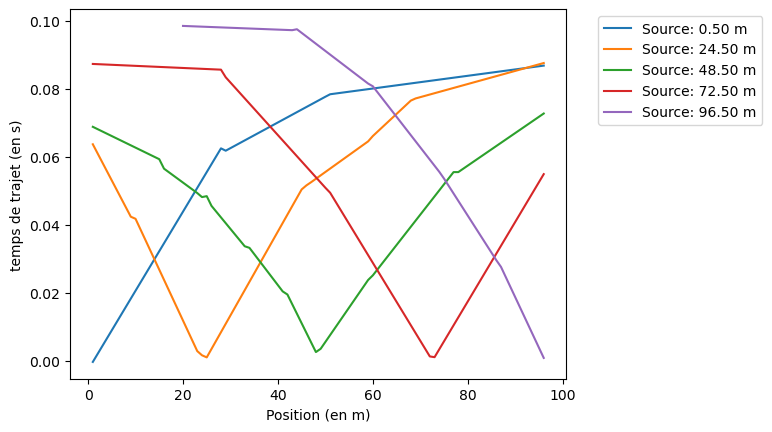

In [4]:
#Permet de vérifier que l'on obtient les mêmes courbes qu'avec réfrapick
ms.donnees_observees(donnees)

On vérifie que les pentes sont cohérentes, c'est à dire qu'elles se ressemblent

()

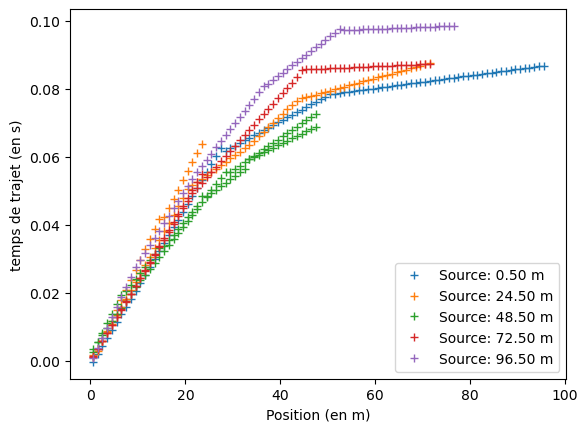

In [5]:
#On déplace toutes les données en zéro et en temps croissant pour un éloingnement de la source
ms.donnees_replace(donnees)

Ensuite nous allons tracer les courbes obtenues pour chaques sources avec des distances positives. On pourra utiliser ses graphes pour faire une première approximation de changement de pente

()

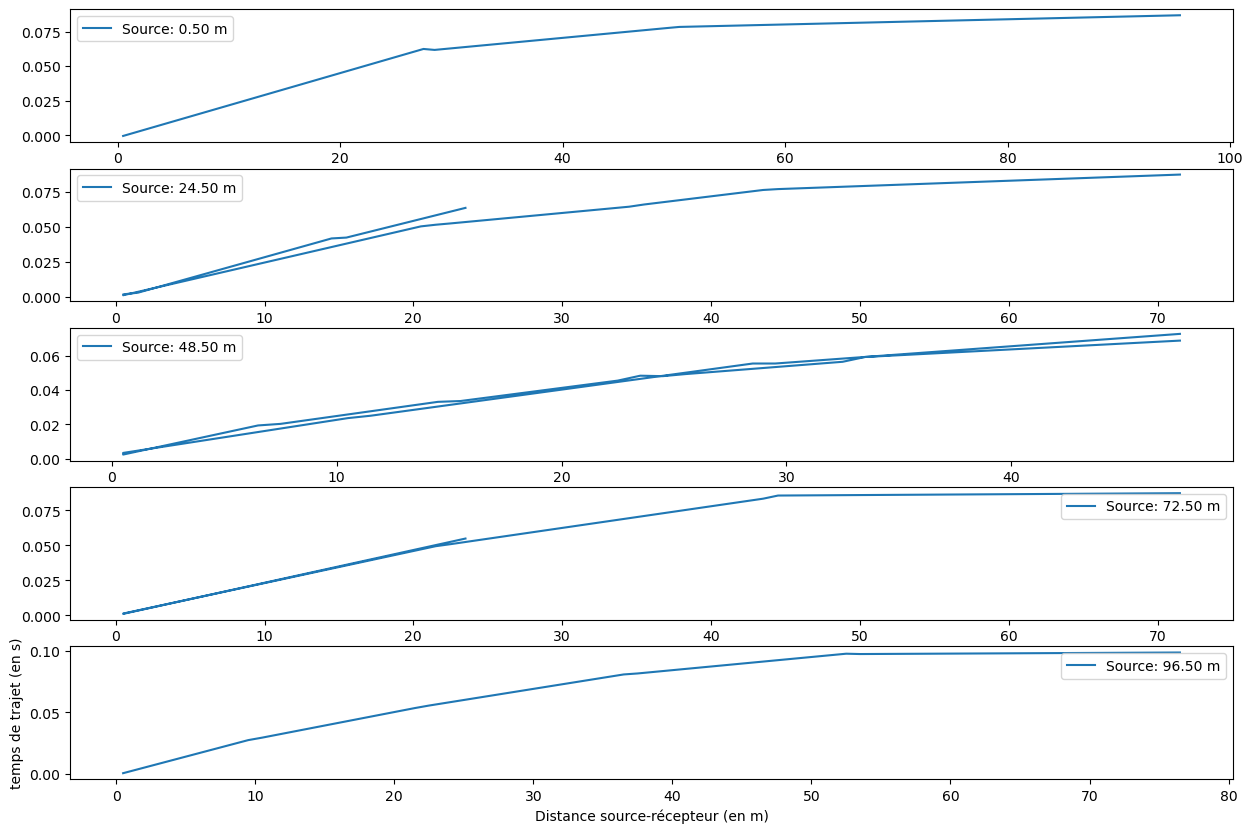

In [6]:
#On trace les courbes des temps d'arrivée en fonction des positions pour chaque source. 
#Dans le but de voir quelle modèle nous devons choisir en fonction des pentes.
ms.donnees_recepteurs(donnees)

#### CHOIX DU MODELE: BICOUCHE SANS PENDAGE

Ce modèle est basé sur la fonction bicouche_sans_pendage qui est dans le module Mod_sism. Cette fonction prends en entrée le point de coupure (un float en m), la position de la source (en chaine de caractère), et les donnees. Et renvoie en sortie la position de la source, l'épaisseur de la première couche, la vitesse de la première couche, la vitesse de la deuxième couche. 
    
Le point de coupure est estimé par l'interprétateur des données de manière graphique.

Ensuite on récupère les épaisseurs et les vitesses de la première couche que l'on garde dans une dataframe apellée res. On ne peut avoir qu'un seul triplet épaisseur vitesse pour chaques sources. 

Si vous voulez supprimer une source (c'est à dire toute la ligne) vous pouvez utiliser la fonction suppr_data_res(res,Source) avec res la dataframe des résultats et Source la position de la source en floatant. 

Si vous voulez supprimer une vitesse vous pouvez utiliser la fonction suppr_val(res,nom_colonne,index_ligne) avec res la dataframe des résultats, Vitesse la chaine de caractère de la colonne et index_ligne l'index de la ligne dans res 


In [7]:
#Création de la dataframe des résultats:
res_bsp=pd.DataFrame(columns =['Source','Epaisseur','Vitesse 1','Vitesse 2'])

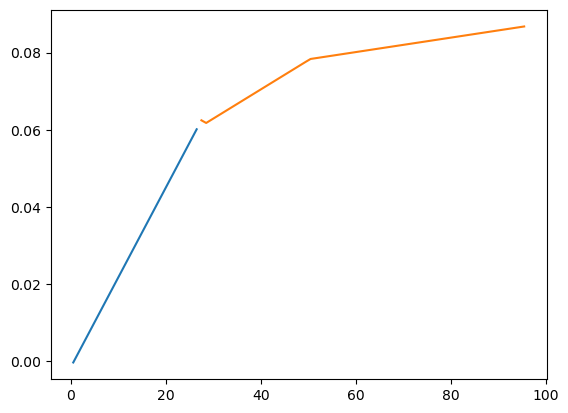

In [8]:
E1=ms.bicouche_sans_pendage(27,'0.50',donnees)
res_bsp=ms.add_data_res(res_bsp,E1)

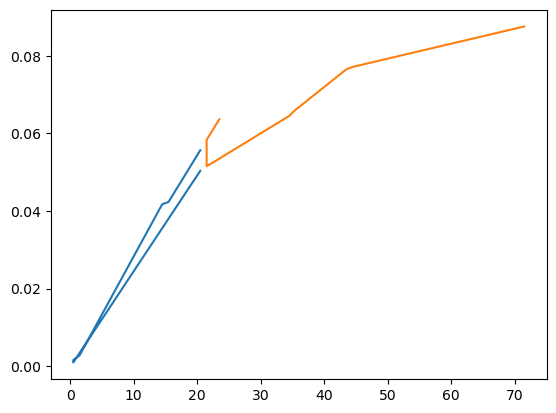

In [9]:
E2=ms.bicouche_sans_pendage(21,'24.50',donnees)
res_bsp=ms.add_data_res(res_bsp,E2)

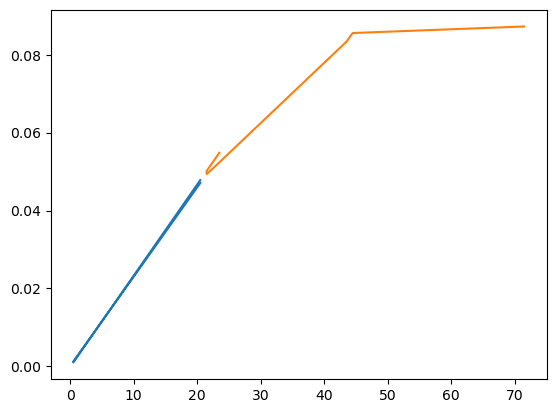

In [10]:
E3=ms.bicouche_sans_pendage(21,'72.50',donnees)
res_bsp=ms.add_data_res(res_bsp,E3)


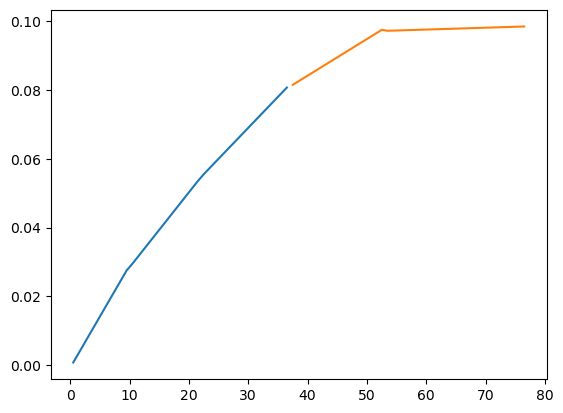

In [11]:
E4=ms.bicouche_sans_pendage(37,'96.50',donnees)
res_bsp=ms.add_data_res(res_bsp,E4)


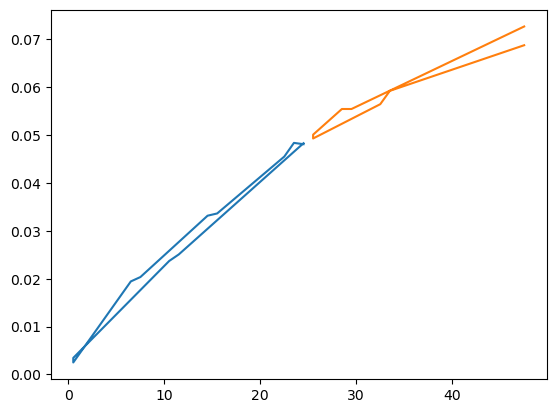

In [25]:
E5=ms.bicouche_sans_pendage(25,'48.50',donnees)
res_bsp=ms.add_data_res(res_bsp,E5)

In [12]:
#ms.suppr_data_res(res_bsp, 48.5)
#ms.suppr_val(res_bsp,'Vitesse 2',2)

   Source  Epaisseur   Vitesse 1    Vitesse 2
0     0.5  12.463124  429.774843  2959.807821
1    24.5   8.181793  381.238321  1428.433821
2    48.5   8.530319  542.823673  1073.498018
3    72.5   9.370260  431.608060  1288.150917
4    96.5  17.068684  461.557805  2630.233573


()

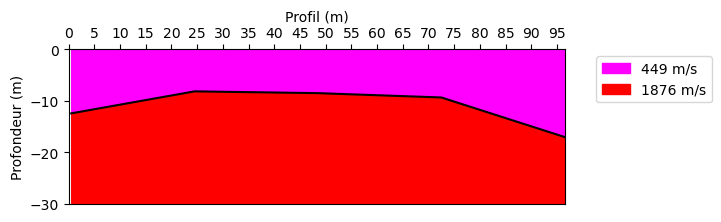

In [26]:
print(res_bsp)
ms.modele_bicouche(res_bsp)

#### CHOIX DU MODELE: BICOUCHE AVEC PENDAGE

Pour le modèle bicouche avec pendage, il nous faut obligatoirement un tir direct et un tir inverse avec un changement de pente dans les deux tirs.

Ce modèle est basé sur la fonction bicouche_avec_pendage qui est dans le module Mod_sism. Cette fonction prends en entrée la position de la source directe (en str), la position de la source retour (en str), le point de coupure pour la source directe,le point de coupure pour la source retour et la dataframe de données. Et renvoie une liste de liste de 2 lignes, la première ligne comprenant la position de la source directe, l'épaisseur de la couche sous la source directe, la vitesse de la première couche et la vitesse de la deuxième couche. La deuxième ligne comprends la position de la source retour, l'épaisseur de la couche sous la source retour, la vitesse de la première couche et la vitesse de la deuxième couche
    
Le point de coupure est estimé par l'interprétateur des données de manière graphique.

Ensuite avec la fonction add_data_res(res,L) on rempli une dataframe préalablement créée composée de 4 colonnes: ['Source','Epaisseur','Vitesse 1','Vitesse 2']. Où res est la dataframe à remplir et L la liste qu'il faut ajouter

Si vous voulez supprimer une source (c'est à dire toute la ligne) vous pouvez utiliser la fonction suppr_data_res(res,Source) avec res la dataframe des résultats et Source la position de la source en floatant. 

Si vous voulez supprimer une vitesse vous pouvez utiliser la fonction suppr_val(res,nom_colonne,index_ligne) avec res la dataframe des résultats, Vitesse la chaine de caractère de la colonne et index_ligne l'index de la ligne dans res  

In [14]:
#Création de la dataframe des résultats:
res_bap=pd.DataFrame(columns =['Source','Epaisseur','Vitesse 1','Vitesse 2'])
print(res_bap)

Empty DataFrame
Columns: [Source, Epaisseur, Vitesse 1, Vitesse 2]
Index: []


[0.0728135208255159, 0.05738371088783342]
   Source  Epaisseur   Vitesse 1    Vitesse 2
0     0.5  12.953907  445.666324  2785.178084
1    96.5  16.437062  445.666324  2785.178084


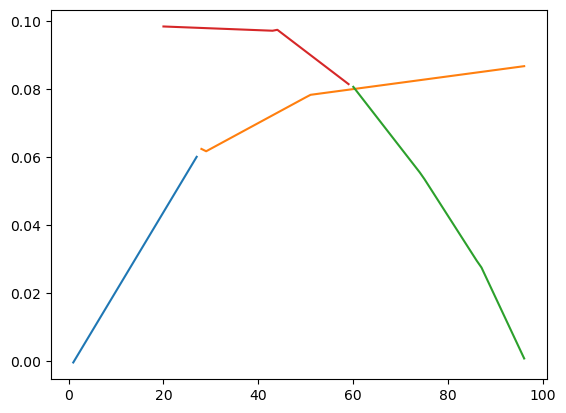

In [15]:
E1=ms.bicouche_avec_pendage('0.50','96.50',27,-37,donnees)
res_bap=ms.add_data_res(res_bap,E1[0])
res_bap=ms.add_data_res(res_bap,E1[1])
print(res_bap)

[0.04304736895927605, 0.03998835698340873]


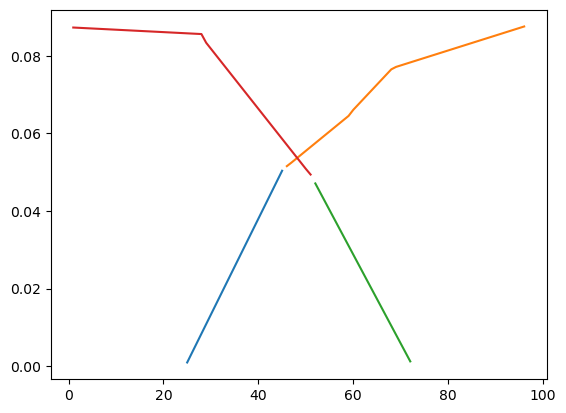

In [16]:
E2=ms.bicouche_avec_pendage('24.50','72.50',21,-21,donnees)
res_bap=ms.add_data_res(res_bap,E2[0])
res_bap=ms.add_data_res(res_bap,E2[1])


   Source  Epaisseur   Vitesse 1    Vitesse 2
0     0.5  12.953907  445.666324  2785.178084
1    24.5   8.834803  420.462038  1367.439176
2    72.5   9.510644  420.462038  1367.439176
3    96.5  16.437062  445.666324  2785.178084


()

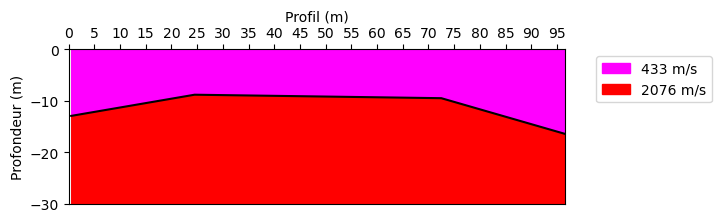

In [17]:
print(res_bap)
ms.modele_bicouche(res_bap)

#### MODELE  TRICOUCHE AVEC PENDAGE

Pour le modèle tricouche avec pendage, il nous faut obligatoirement un tir direct et un tir inverse avec un changement de pente dans les deux tirs.

Ce modèle est basé sur la fonction tricouche_avec_pendage qui est dans le module Mod_sism. Cette fonction prends en entrée la position de la source directe (en str), la position de la source retour (en str), le premier point de coupure pour la source directe,le deuxième point de coupure pour la source directe ,le premier point de coupure pour la source retour (toujours négatif),le deuxième point de coupure pour la source retour (toujours négatif) et la dataframe de données. Et renvoie une liste de liste de 2 lignes, la première ligne comprennant la position de la source direct, l'épaisseur de la couche sous la source directe, la vitesse de la première couche et la vitesse de la deuxième couche. La deuxième ligne comprends la position de la source retour, l'épaisseur de la couche sous la source retour, la vitesse de la première couche et la vitesse de la deuxième couche
    
Les points de coupure sont estimés par l'interprétateur des données de manière graphique.

Ensuite avec la fonction add_data_res(res,L) on rempli une dataframe préalablement créée composée de 6 colonnes: ['Source','Epaisseur 1', 'Epaisseur 2','Vitesse 1','Vitesse 2','Vitesse 3']. Où res est la dataframe à remplir et L la liste qu'il faut ajouter

Si vous voulez supprimer une source (c'est à dire toute la ligne) vous pouvez utiliser la fonction suppr_data_res(res,Source) avec res la dataframe des résultats et Source la position de la source en floatant. 

Si vous voulez supprimer une vitesse vous pouvez utiliser la fonction suppr_val(res,nom_colonne,index_ligne) avec res la dataframe des résultats, Vitesse la chaine de caractère de la colonne et index_ligne l'index de la ligne dans res

In [18]:
#Création de la dataframe des résultats:
res_tap=pd.DataFrame(columns =['Source','Epaisseur 1', 'Epaisseur 2','Vitesse 1','Vitesse 2','Vitesse 3'])
print(res_tap)

Empty DataFrame
Columns: [Source, Epaisseur 1, Epaisseur 2, Vitesse 1, Vitesse 2, Vitesse 3]
Index: []


   Source  Epaisseur 1  Epaisseur 2   Vitesse 1    Vitesse 2    Vitesse 3
0     0.5     9.807723    13.916743  445.666458  1095.047358  8132.548007
1    96.5    10.132927    27.264465  445.666458  1095.047358  8132.548007


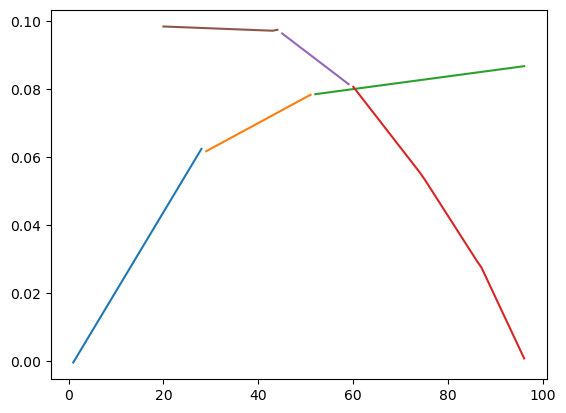

In [19]:
E1=ms.tricouche_avec_pendage('0.50','96.50',28,51,-37,-52,donnees)
res_tap=ms.add_data_res(res_tap,E1[0])
res_tap=ms.add_data_res(res_tap,E1[1])
print(res_tap)

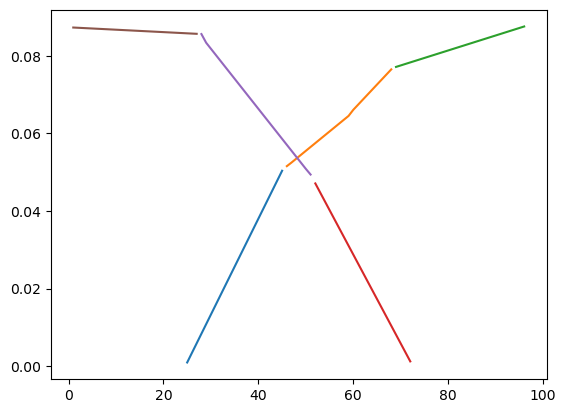

In [20]:
E2=ms.tricouche_avec_pendage('24.50','72.50',21,44,-21,-45,donnees)
res_tap=ms.add_data_res(res_tap,E2[0])
res_tap=ms.add_data_res(res_tap,E2[1])


   Source  Epaisseur 1  Epaisseur 2   Vitesse 1    Vitesse 2    Vitesse 3
0     0.5     9.807723    13.916743  445.666458  1095.047358  8132.548007
1    24.5     6.766620    10.684763  420.462038   741.200573  4294.133318
2    72.5     4.044663    24.062968  420.462038   741.200573  4294.133318
3    96.5    10.132927    27.264465  445.666458  1095.047358  8132.548007


()

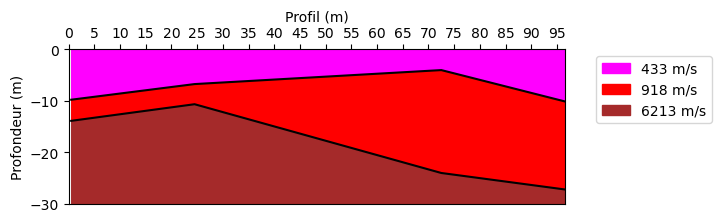

In [21]:
print(res_tap)
ms.modele_tricouche(res_tap)

Empty DataFrame
Columns: [Source, Epaisseur 1, Epaisseur 2, Vitesse 1, Vitesse 2, Vitesse 3]
Index: []


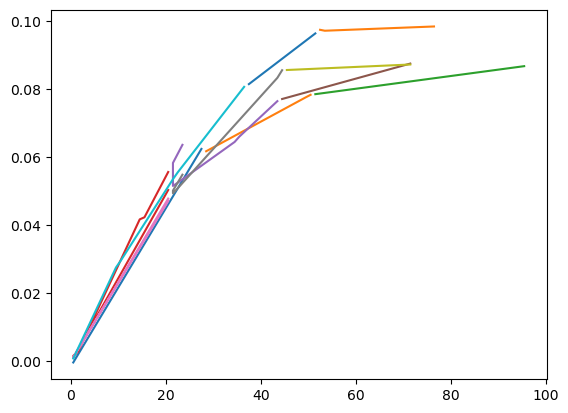

In [22]:
#Création de la dataframe des résultats:
res_tsp=pd.DataFrame(columns =['Source','Epaisseur 1', 'Epaisseur 2','Vitesse 1','Vitesse 2','Vitesse 3'])
print(res_tsp)
E1=ms.tricouche_sans_pendage('0.50',28,51,donnees)
E2=ms.tricouche_sans_pendage('24.50',21,44,donnees)
E3=ms.tricouche_sans_pendage('72.50',21,45,donnees)
E4=ms.tricouche_sans_pendage('96.50',37,52,donnees)

res_tsp=ms.add_data_res(res_tsp,E1)
res_tsp=ms.add_data_res(res_tsp,E2)
res_tsp=ms.add_data_res(res_tsp,E3)
res_tsp=ms.add_data_res(res_tsp,E4)

   Source  Epaisseur 1  Epaisseur 2   Vitesse 1    Vitesse 2     Vitesse 3
0     0.5     9.134604    19.588938  429.775111  1323.102387   5340.546002
1    24.5     6.817425    15.439797  381.238321  1060.584215   2591.301906
2    72.5     4.879391    21.622580  431.608060   657.067643  16058.980970
3    96.5    11.008775    24.883631  461.557805   938.624044  19482.368457


()

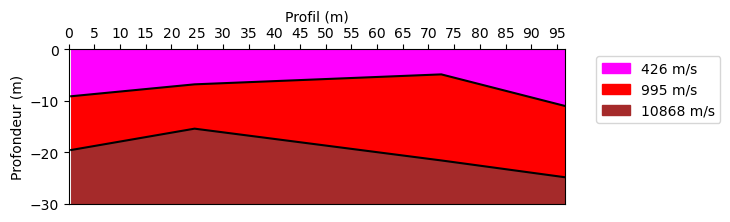

In [23]:
print(res_tsp)
ms.modele_tricouche(res_tsp)